In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

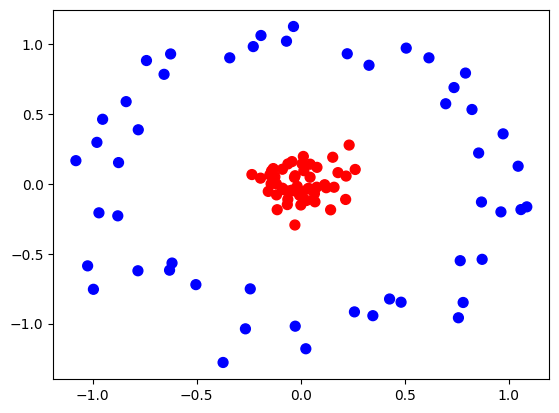

In [30]:

from sklearn.datasets import make_circles # Updated import path
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

###  Using Linear Kernal

In [32]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [34]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_2708\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


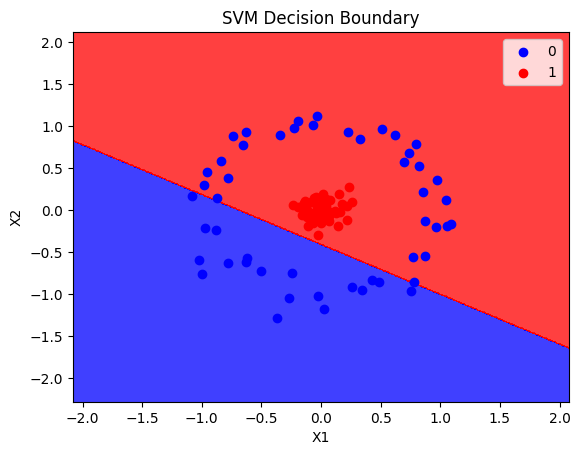

In [35]:
plot_decision_boundary(X, y, classifier)

In [36]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

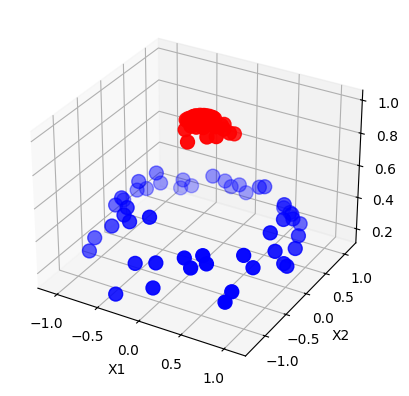

In [37]:
plot_3d_plot(X,y)

### using e^-x1^2 +e^- x2^2  --->kernals :
### For the given function: \(K(x_{2},x_{1})=e^{-x_{2}^{2}}+e^{-x_{1}^{2}}\)

In [40]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HOME\AppData\Local\Temp\ipykernel_2708\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


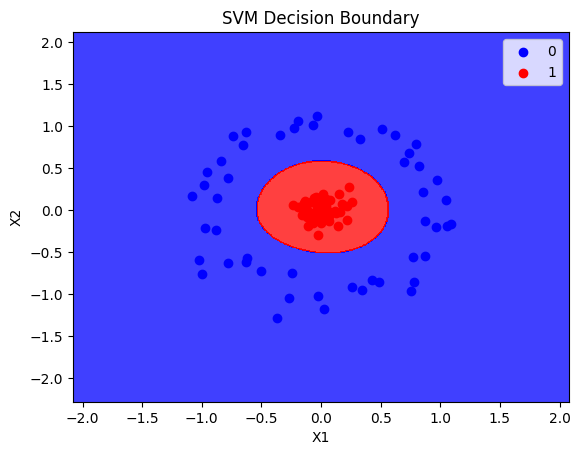

In [42]:
plot_decision_boundary(X, y, rbf_classifier)

In [43]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HOME\AppData\Local\Temp\ipykernel_2708\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


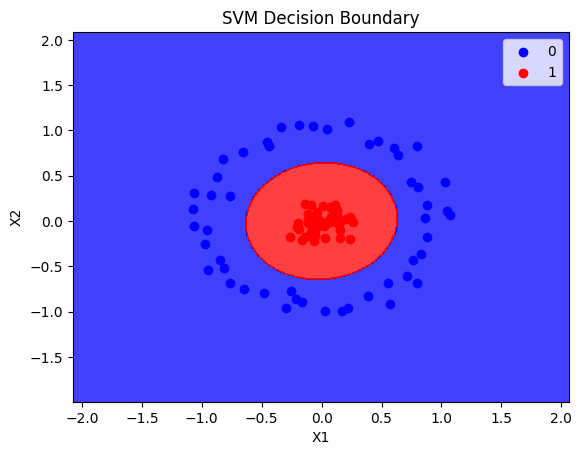

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 0.82917878, -0.36289435],
       [-0.06935353,  1.04685309],
       [-0.64941342, -0.74862684],
       [-0.25432948, -0.76762727],
       [ 0.20198663,  0.01998301],
       [ 0.12812676,  0.06419221],
       [ 1.07040884,  0.06508055],
       [ 0.55776595, -0.67831542],
       [ 0.02598807, -0.18238338],
       [-0.09236115, -0.11609312],
       [ 0.10938492,  0.18065072],
       [ 0.79998622, -0.68515394],
       [ 0.01174603,  0.16110024],
       [-0.10318891,  0.02146129],
       [ 0.15577057, -0.1817946 ],
       [ 0.030355  , -0.99219879],
       [-0.13876172, -0.17194495],
       [ 0.8803511 , -0.17726004],
       [-0.06544701,  0.02501771],
       [ 0.2370804 ,  0.04097581],
       [-0.65217342,  0.75933701],
       [-0.01057762, -0.03785923],
       [-0.97380258, -0.25346798],
       [-0.92412856,  0.28440085],
       [ 0.21652383, -0.95604967],
       [ 0.8006256 ,  0.37153142],
       [ 0.22842845,  1.08848327],
       [-0.13731991,  0.18747686],
       [-0.11331783,

In [18]:
np.exp(-(X**2)).sum(1)

array([1.37942342, 1.32943983, 1.22686256, 1.49210639, 1.95962322,
       1.97960539, 1.31375084, 1.36385159, 1.96660831, 1.9781185 ,
       1.95599832, 1.15265898, 1.97424264, 1.98894806, 1.94351843,
       1.37272052, 1.95179708, 1.42976285, 1.99510016, 1.94366571,
       1.21536333, 1.99845583, 1.32517662, 1.34800372, 1.35510437,
       1.39783237, 1.25496704, 1.94678285, 1.9807347 , 1.95743924,
       1.48449512, 1.98935733, 1.43445424, 1.18107915, 1.99499902,
       1.36095692, 1.32524647, 1.97637273, 1.93222438, 1.32948954,
       1.28818704, 1.15396768, 1.99668159, 1.97055965, 1.35359875,
       1.31351604, 1.90053489, 1.25239779, 1.97058678, 1.94889524,
       1.98675879, 1.99198325, 1.31899439, 1.98943896, 1.9678507 ,
       1.93246596, 1.23214502, 1.99495961, 1.99170084, 1.99137066,
       1.99689615, 1.34405913, 1.98218654, 1.15190447, 1.98959101,
       1.40384556, 1.98360163, 1.9542228 , 1.22975231, 1.90740735,
       1.43156289, 1.99420504, 1.32291355, 1.29404442, 1.29744

In [19]:
X_new=np.exp(-(X**2))

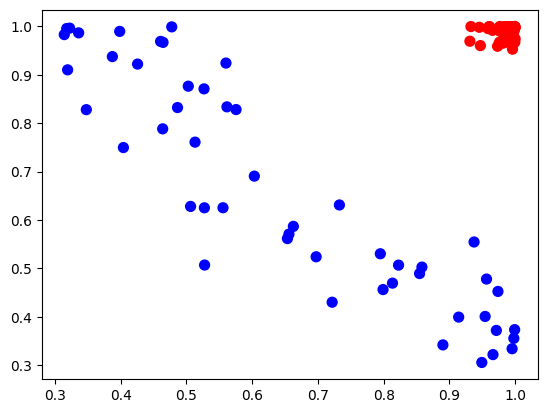

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')